In [1]:
%matplotlib inline
from pylab import *

In [2]:
AWG = arange(40)+1
diameter_inches = 0.005*92.**((36. - AWG)/39.)
diameter_mils = 1000.*diameter_inches
diameter_mm = diameter_mils*0.0254

In [3]:
sigma_copper = 1.72e-8 # 100% IACS, from wikipedia units = Ohm * m

In [4]:
area = pi*(0.5*diameter_mm*0.001)**2 #in square meters

In [5]:
R_per_meter = sigma_copper/area #resistance per meter
R_per_cm = R_per_meter/100.0
R_per_in = R_per_cm*2.54
R_per_foot = R_per_in*12.0

In [6]:
5./R_per_cm[30]

1174.0165551056286

In [7]:
R_per_meter[23]


0.084012963960567247

In [8]:
R = 1.0 #cm
C = 2*pi*R
C
(5./R_per_cm[29])/C  #30 AWG, 5 ohms, 20 mm across

235.61417818657955

200 feet long

In [9]:
C*200

1256.6370614359173

In [10]:
14*diameter_mm[29]

3.5649460416732186

square coil, 20 mm inner diameter, 3.6 mm X 3.6 mm for 14X14 units, 200 turns, 30 AWG copper wire.

1 tesla, 1 amp, 12 meters long wire, 1 cm amplitude, or +/- 5 mm, 20 Hz = 2.5 W or so, a couple pounds of force

In [11]:
m = [0,0,1.]

In [12]:
r = [1.,1.,1.]

In [13]:
dot(r,m)

1.0

$\mathbf{B}({\mathbf{r}})=\nabla\times{\mathbf{A}}=\frac{\mu_{0}}{4\pi}\left(\frac{3\mathbf{r}(\mathbf{m}\cdot\mathbf{r})}{r^{5}}-\frac{{\mathbf{m}}}{r^{3}}\right).$

$\mathbf{B} \cdot \mathbf{\hat{x}} = \frac{\mu_{0}}{4\pi}\left(\frac{3\mathbf{r}(\mathbf{m}\cdot\mathbf{r})}{r^{5}}-\frac{{\mathbf{m}}}{r^{3}}\right) \cdot \mathbf{\hat{x}} = \frac{\mu_{0}}{4\pi}\left(\frac{3\mathbf{r}(\mathbf{m}\cdot\mathbf{r})\cdot\mathbf{\hat{x}}}{r^{5}}-\frac{{\mathbf{m}\cdot \mathbf{\hat{x}}}}{r^{3}}\right)$

$\mathbf{m} = [0,0,1]$

$\mathbf{r} = [x,0,z]$

$\mathbf{m}\cdot\mathbf{r} = z$

$\mathbf{m}\cdot\mathbf{\hat{z}} = 1$

$\mathbf{r}\cdot\mathbf{\hat{z}} = z$

$\mathbf{r}\cdot\mathbf{\hat{x}} = x$

$\mathbf{m}\cdot\mathbf{\hat{x}} = 0$


$\mathbf{r}(\mathbf{m}\cdot\mathbf{r})\cdot \mathbf{\hat{x}} = xz$


$\mathbf{B} \cdot \mathbf{x} = \frac{\mu_{0}}{4\pi}\left(\frac{3xz}{r^5} \right) = \frac{\mu_{0}}{4\pi}\left(\frac{3xz}{(x^2 + z^2)^{5/2}} \right)$

$\mathbf{B} \cdot \mathbf{z} = \frac{\mu_{0}}{4\pi}\left(\frac{3z^2}{r^{5}}-\frac{1}{r^{3}}\right)$

$\frac{\mu_{0}}{4\pi}\left(\frac{3z^2}{r^{5}}-\frac{1}{r^{3}}\right)$

So if we want to look at the relative values of the field(ignoreing actual magnitude), we can make all the prefactors 1 and just look at a scalar x component field

$B_x  = \frac{3xz}{r^5}$

$B_z = \frac{3z^2}{r^5} - \frac{1}{r^5}$

$\frac{\partial B_x}{\partial x} = \frac{zr^5 - 5xzr^4 \partial r/\partial x}{r^{10}}$

$r = \sqrt{x^2 + z^2}$

$\partial r /\partial x = \frac{1}{2}\frac{2x}{\sqrt{x^2 + z^2}} = \frac{x}{r}$

$\frac{\partial B_x}{\partial x} = \frac{zr^5 - 5xzr^4 \partial r/\partial x}{r^{10}} = \frac{zr^5 - 5x^2zr^3}{r^{10}} =\frac{zr^2 - 5x^2z}{r^{7}} = 0$

$zr^2 = 5x^2z$

$z(x^2 + z^2) = 5x^2z$

$zx^2 + z^3) = 5x^2z$

$z^3 = 4x^2z$

$z^2 = 4x^2$

$z = 2x$

<matplotlib.colorbar.Colorbar instance at 0x10ab715a8>

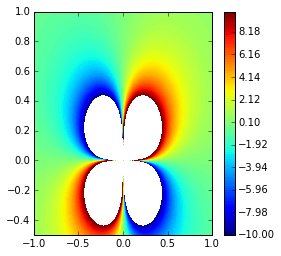

In [28]:
x = linspace(-1,1,1000)
z = linspace(-0.5,1,1000)
(X,Z) = meshgrid(x,z)

r = sqrt(X**2 + Z**2)
B_x = 3*X*Z/r**5
B_z = 3*Z**2/r**5 - 1./r**3

r2 = sqrt(X**2 + (Z-0.5)**2)
B_x2 = 3*X*(Z-0.5)/r2**5
B_z2 = 3*(Z-0.5)**2/r2**5 - 1./r2**3

figure(figsize = (4,4))
#streamplot(X,Z,B_x,B_z)
levels = linspace(-10,10,100)
contourf(X,Z,B_x,levels)
colorbar()
#contourf(X,Z,B_x,100)

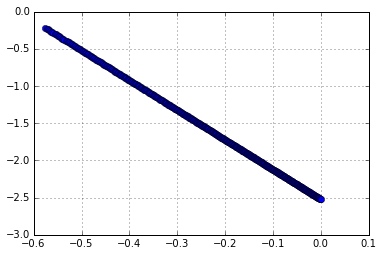

In [29]:
plot(log10(z[510:]),log10(B_x[510:,500]),'o');grid()

In [30]:
z[500]

0.25075075075075071

[-0.3, 0.3, 0, 0.5]

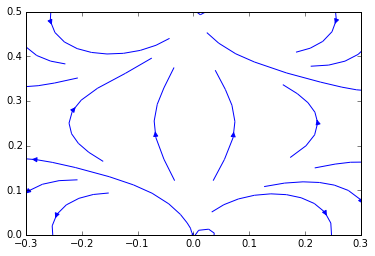

In [31]:
streamplot(X,Z,B_x + B_x2,B_z + B_z2)
axis([-.3,.3,0,.5])

[-0.5, 0.5, -0.5, 0.5]

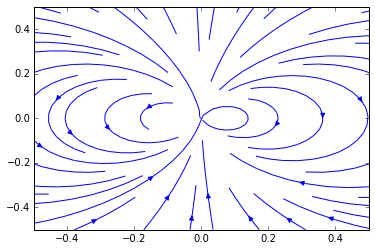

In [39]:
streamplot(X,Z,B_x,B_z)
axis([-.5,.5,-.5,.5])

$\mathbf{B} \cdot \mathbf{x} = \frac{\mu_{0}|m|}{4\pi}\left(\frac{3xz}{r^5} \right)$

$\mathbf{B} \cdot \mathbf{z} = \frac{\mu_{0}|m|}{4\pi}\left(\frac{3z^2}{r^{5}}-\frac{1}{r^{3}}\right)$

$\mathbf{F_{total}} = I\int \mathrm{d}\mathbf{\ell}\times \mathbf{B} = 2\pi xIB_x \hat{\mathbf{z}}$


$|F_{total}|= \frac{\mu_{0}I|m|}{2}\left(\frac{3x^2z}{r^5} \right)$

In [14]:
Bmag = sqrt(B_x**2 + B_z**2)

<matplotlib.contour.QuadContourSet instance at 0x114e7def0>

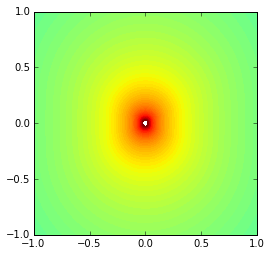

In [24]:
figure(figsize = (4,4))
levels = linspace(-5,5,100)
contourf(X,Z,log10(Bmag),levels)

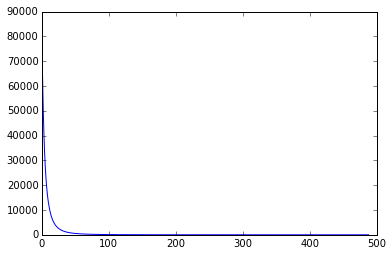

In [28]:
plot(Bmag[501,511:])